In [ ]:
#
# Working through
# https://github.com/salvadorgarciamunoz/kipet/blob/master/kipet/examples/Ex_7_concentration_heterogeneous_data.py
#

In [3]:
import inspect
import os
import sys
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

from kipet.library.TemplateBuilder import *
from kipet.library.ParameterEstimator import *
from kipet.library.data_tools import *
from kipet.library.common.charts import make_plot

In [6]:
filename = 'missing_data.txt'

In [7]:
# New generic data read method
C_frame = read_file(filename, directory = '../data_sets')

read dir : /home/paperspace/learn_kipet/kipet_examples/../data_sets/missing_data.txt


In [10]:
C_frame

,A,B,C
0.0000,0.001027,0.000000,0.000013
0.1667,NaN,0.000041,NaN
0.3334,0.000928,0.000081,NaN
0.5001,NaN,0.000103,NaN
0.6668,0.000847,0.000127,NaN
0.8335,NaN,0.000132,NaN
1.0002,0.000788,0.000144,0.000069
1.1669,NaN,0.000147,NaN
1.3336,0.000733,0.000148,NaN
1.5003,NaN,0.000146,NaN


In [11]:
# Make the template
builder = TemplateBuilder()

# Option to clear all data from the template
builder.clear_data()

In [12]:
# Add individual species to the template
builder.add_concentration_data(C_frame['A'])
print(f'\n\nThis is in the TB after A\n\n: {builder._concentration_data}')

0.0000    0.001027
0.1667         NaN
0.3334    0.000928
0.5001         NaN
0.6668    0.000847
0.8335         NaN
1.0002    0.000788
1.1669         NaN
1.3336    0.000733
1.5003         NaN
1.6670    0.000682
1.8337         NaN
2.0004    0.000634
2.1671         NaN
2.3338    0.000592
2.5005         NaN
2.6672    0.000549
2.8339         NaN
3.0006    0.000509
3.1673         NaN
3.3340    0.000475
3.5007         NaN
3.6674    0.000443
3.8341         NaN
4.0008    0.000410
4.1675         NaN
4.3342    0.000380
4.5009         NaN
4.6676    0.000351
4.8343         NaN
5.0010    0.000328
5.1677         NaN
5.3344    0.000300
5.5011         NaN
5.6678    0.000277
5.8345         NaN
6.0012    0.000261
6.1679         NaN
6.3346    0.000241
6.5013         NaN
6.6680    0.000220
6.8347         NaN
7.0014    0.000202
7.1681         NaN
7.3348    0.000191
7.5015         NaN
7.6682    0.000180
7.8349         NaN
8.0016    0.000164
8.1683         NaN
8.3350    0.000147
8.5017         NaN
8.6684    0.

In [13]:
builder.add_concentration_data(C_frame['C'], overwrite=False)
print(builder._concentration_data)
print(f'\n\nThis is in the TB after B\n\n: {builder._concentration_data}')

0.0000    0.000013
0.1667         NaN
0.3334         NaN
0.5001         NaN
0.6668         NaN
0.8335         NaN
1.0002    0.000069
1.1669         NaN
1.3336         NaN
1.5003         NaN
1.6670         NaN
1.8337         NaN
2.0004    0.000218
2.1671         NaN
2.3338         NaN
2.5005         NaN
2.6672         NaN
2.8339         NaN
3.0006    0.000361
3.1673         NaN
3.3340         NaN
3.5007         NaN
3.6674         NaN
3.8341         NaN
4.0008    0.000485
4.1675         NaN
4.3342         NaN
4.5009         NaN
4.6676         NaN
4.8343         NaN
5.0010    0.000586
5.1677         NaN
5.3344         NaN
5.5011         NaN
5.6678         NaN
5.8345         NaN
6.0012    0.000670
6.1679         NaN
6.3346         NaN
6.5013         NaN
6.6680         NaN
6.8347         NaN
7.0014    0.000733
7.1681         NaN
7.3348         NaN
7.5015         NaN
7.6682         NaN
7.8349         NaN
8.0016    0.000784
8.1683         NaN
8.3350         NaN
8.5017         NaN
8.6684      

In [14]:
components = {'A':1e-3,'B':0,'C':0}
builder.add_mixture_component(components)
builder.add_parameter('k1',bounds=(0.0,5.0))
builder.add_parameter('k2',bounds=(0.0,1.0))

In [15]:
# define explicit system of ODEs
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']
    exprs['B'] = m.P['k1']*m.Z[t,'A']-m.P['k2']*m.Z[t,'B']
    exprs['C'] = m.P['k2']*m.Z[t,'B']
    return exprs

builder.set_odes_rule(rule_odes)
opt_model = builder.create_pyomo_model(0.0,10.0)

In [17]:
sigmas = {'A':1e-10,'B':1e-11,'C':1e-10}

p_estimator = ParameterEstimator(opt_model)
p_estimator.apply_discretization('dae.collocation',nfe=60,ncp=3,scheme='LAGRANGE-RADAU')

In [18]:
options = dict()
#options['nlp_scaling_method'] = 'user-scaling'

# finally we run the optimization
results_pyomo = p_estimator.run_opt('ipopt',
                                    variances=sigmas,
                                    tee=True,
                                    solver_opts = options)

Ipopt 3.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:     4683
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      400

Total number of variables............................:     1085
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1083
Total number of inequali

In [19]:
# And display the results
print("The estimated parameters are:")
for k, v in results_pyomo.P.items():
    print(k, v)

The estimated parameters are:
k1 0.22839949817358807
k2 0.8562572185983031


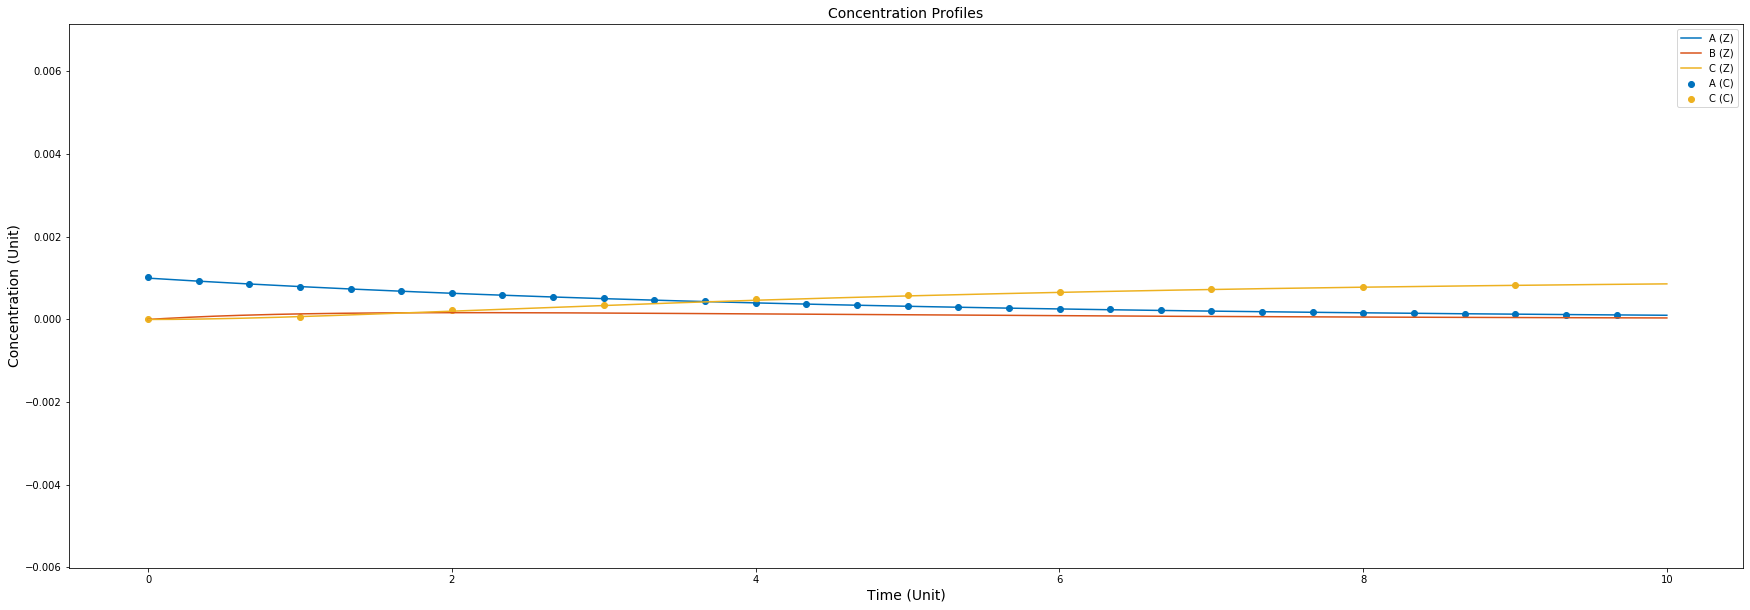

In [20]:
# New method for making plots simpler, look at the func for some options
make_plot(results_pyomo, 'C')